<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Step 1) Load the Pima Indian Diabetes dataset into Python using pandas library

In [1]:
#Step 1
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


url = 'https://gist.githubusercontent.com/SoumenAtta/e00bd5cb6ed13a983bf48b845325c837/raw/d5e3560b8bfe97ba126b5e94bed4487c2b1ed787/diabetes.csv'
df1 = pd.read_csv(url)
pd.concat([df1.head(), df1.tail()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


(Step 2) Preprocess the data to clean, remove null values, and normalize if needed.

In [2]:

#Step 2 remove null
df1 = df1.dropna()

Series([], dtype: int64)


<Axes: xlabel='Outcome', ylabel='count'>

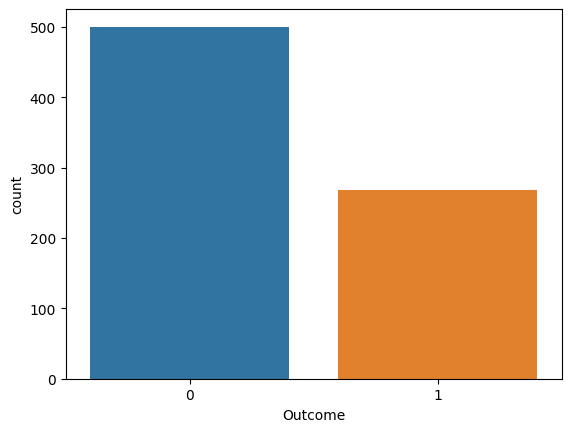

In [3]:
normalized_data = (df1 - df1.min()) / (df1.max() - df1.min())

# Check for null values in the DataFrame
null_values = df1.isnull().sum()

# Print columns with null values
print(null_values[null_values > 0])

#Check total value of outcome
sns.countplot(x='Outcome', data=df1)

In [4]:
#info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Splitting the data into independent(X)

X = df1.iloc[:,[0,1,2,3,4,5,6,7]] # Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetespedigreeFunction, Age
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# Splitting the data into independent(y)

y = df1.iloc[:, 8] # Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
# normalize the range of independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

(Step 3) Split the dataset into training and testing subsets. Use 1) 50:50; 2)70:30; 3)80:20; and 4)90:10 ratio of training to testing data

In [8]:
# Split the dataset into training and testing sets using the train_test_split function.

from sklearn.model_selection import train_test_split

#Test size 50:50
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.50, random_state=1)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(384, 8)
(384, 8)
(384,)
(384,)


In [9]:
#Test size 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [10]:
#Test size 80:20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [11]:
#Test size 90:10
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.10, random_state=1)

print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(691, 8)
(77, 8)
(691,)
(77,)


In [12]:
# Check the dimensions of X_test and y_test
print("Number of samples in X_test1:", X_test1.shape[0])
print("Number of samples in y_test1:", y_test1.shape[0])
print("Number of samples in X_train1:", X_train1.shape[0])
print("Number of samples in y_train1:", y_train1.shape[0])
print()
print("Number of samples in X_test2:", X_test2.shape[0])
print("Number of samples in y_test2:", y_test2.shape[0])
print("Number of samples in X_train2:", X_train2.shape[0])
print("Number of samples in y_train2:", y_train2.shape[0])
print()
print("Number of samples in X_test3:", X_test3.shape[0])
print("Number of samples in y_test3:", y_test3.shape[0])
print("Number of samples in X_train3:", X_train3.shape[0])
print("Number of samples in y_train3:", y_train3.shape[0])
print()
print("Number of samples in X_test4:", X_test4.shape[0])
print("Number of samples in y_test4:", y_test4.shape[0])
print("Number of samples in X_train4:", X_train4.shape[0])
print("Number of samples in y_train4:", y_train4.shape[0])
print()

Number of samples in X_test1: 384
Number of samples in y_test1: 384
Number of samples in X_train1: 384
Number of samples in y_train1: 384

Number of samples in X_test2: 231
Number of samples in y_test2: 231
Number of samples in X_train2: 537
Number of samples in y_train2: 537

Number of samples in X_test3: 154
Number of samples in y_test3: 154
Number of samples in X_train3: 614
Number of samples in y_train3: 614

Number of samples in X_test4: 77
Number of samples in y_test4: 77
Number of samples in X_train4: 691
Number of samples in y_train4: 691



(Step 4) Perform logistic regression on the training data and show the training accuracy

In [13]:
## (For test size 50:50)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train1, y_train1)

#Perform prediction
y_pred1 = classifier.predict(X_train1)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_train1, 'Predicted' : y_pred1})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
training_accuracy1 = accuracy_score(y_train1, y_pred1)

# Print the training accuracy
print("Training Accuracy:", training_accuracy1)

     Actual(Trained)  Predicted
555                0          0
142                0          0
618                1          0
6                  1          0
267                0          0
..               ...        ...
645                0          1
715                1          1
72                 1          1
235                1          1
37                 1          0

[384 rows x 2 columns]

Training Accuracy: 0.78125


In [14]:
## (For test size 70:30)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train2, y_train2)

#Perform prediction
y_pred2 = classifier.predict(X_train2)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_train2, 'Predicted' : y_pred2})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
training_accuracy2 = accuracy_score(y_train2, y_pred2)

# Print the training accuracy
print("Training Accuracy:", training_accuracy2)

     Actual(Trained)  Predicted
88                 1          1
467                0          0
550                0          0
147                0          0
481                0          0
..               ...        ...
645                0          1
715                1          1
72                 1          1
235                1          1
37                 1          0

[537 rows x 2 columns]

Training Accuracy: 0.7746741154562383


In [ ]:
## (For test size 80:20)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train3, y_train3)

#Perform prediction
y_pred3 = classifier.predict(X_train3)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_train3, 'Predicted' : y_pred3})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
training_accuracy3 = accuracy_score(y_train3, y_pred3)

# Print the training accuracy
print("Training Accuracy:", training_accuracy3)

In [16]:
## (For test size 90:10)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train4, y_train4)

#Perform prediction
y_pred4 = classifier.predict(X_train4)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_train4, 'Predicted' : y_pred4})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
training_accuracy4 = accuracy_score(y_train4, y_pred4)

# Print the training accuracy
print("Training Accuracy:", training_accuracy4)

     Actual(Trained)  Predicted
69                 0          0
382                0          0
195                1          1
84                 1          1
442                0          0
..               ...        ...
645                0          1
715                1          1
72                 1          1
235                1          1
37                 1          0

[691 rows x 2 columns]

Training Accuracy: 0.7800289435600579


(Step 5) Use the trained model to make predictions on the testing data.
---



In [17]:
print(classifier.predict_proba(X))

[[0.28327238 0.71672762]
 [0.95048133 0.04951867]
 [0.21057184 0.78942816]
 ...
 [0.82404661 0.17595339]
 [0.71861099 0.28138901]
 [0.9267883  0.0732117 ]]


In [18]:
## (For test size 50:50)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_test1, y_test1)

#Perform prediction
y_pred11 = classifier.predict(X_test1)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_test1, 'Predicted' : y_pred11})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
testing_accuracy1 = accuracy_score(y_test1, y_pred11)

# Print the training accuracy
print("Testing Accuracy:", testing_accuracy1)

     Actual(Trained)  Predicted
285                0          1
101                0          0
581                0          0
352                0          0
726                0          0
..               ...        ...
574                0          0
379                0          0
191                0          1
414                1          0
343                0          0

[384 rows x 2 columns]

Testing Accuracy: 0.7682291666666666


In [23]:
## (For test size 70:30)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_test2, y_test2)

#Perform prediction
y_pred22 = classifier.predict(X_test2)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_test2, 'Predicted' : y_pred22})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
testing_accuracy2 = accuracy_score(y_test2, y_pred22)

# Print the training accuracy
print("Testing Accuracy:", testing_accuracy2)

     Actual(Trained)  Predicted
285                0          1
101                0          0
581                0          0
352                0          0
726                0          0
..               ...        ...
241                0          0
599                0          0
650                0          0
11                 1          1
214                1          0

[231 rows x 2 columns]

Testing Accuracy: 0.8051948051948052


In [24]:
## (For test size 80:20)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_test3, y_test3)

#Perform prediction
y_pred33 = classifier.predict(X_test3)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_test3, 'Predicted' : y_pred33})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
testing_accuracy3 = accuracy_score(y_test3, y_pred33)

# Print the training accuracy
print("Testing Accuracy:", testing_accuracy3)

     Actual(Trained)  Predicted
285                0          1
101                0          0
581                0          0
352                0          0
726                0          0
..               ...        ...
563                0          0
318                0          0
154                1          1
684                0          0
643                0          0

[154 rows x 2 columns]

Testing Accuracy: 0.7792207792207793


In [25]:
## (For test size 90:10)
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_test4, y_test4)

#Perform prediction
y_pred44 = classifier.predict(X_test4)

#create panda dataframe then compare predicted and actual data
result = pd.DataFrame({'Actual(Trained)' : y_test4, 'Predicted' : y_pred44})
print(result)
print()

from sklearn.metrics import accuracy_score
# Calculate the training accuracy
testing_accuracy4 = accuracy_score(y_test4, y_pred44)

# Print the training accuracy
print("Testing Accuracy:", testing_accuracy4)

     Actual(Trained)  Predicted
285                0          1
101                0          0
581                0          0
352                0          0
726                0          0
..               ...        ...
699                0          1
680                0          0
754                1          1
23                 1          0
394                1          1

[77 rows x 2 columns]

Testing Accuracy: 0.7792207792207793


(Step 6) Evaluate the model's performance using appropriate metrics such as accuracy, true positive rate and true negative rate

In [26]:
print(classifier.predict_proba(X))

[[0.30122636 0.69877364]
 [0.94185671 0.05814329]
 [0.26344765 0.73655235]
 ...
 [0.83980223 0.16019777]
 [0.67462153 0.32537847]
 [0.92225221 0.07774779]]


In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

NameError: ignored

In [28]:
from sklearn.metrics import accuracy_score #accuracy

accuracy_score(y_test,y_pred)

NameError: ignored

In [29]:
from sklearn.metrics import recall_score #true positive rate
recall_score(y_test, y_pred)

NameError: ignored

In [30]:
def calculate_true_negative_rate(tn, fp):
    return tn / (tn + fp)

# Calculate true negative rate
tnr = calculate_true_negative_rate(tn, fp)
print("True Negative Rate (Sensitivity):", tnr)

NameError: ignored

In [31]:
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print(classification_report(y_test, y_pred,target_names=target_names))

NameError: ignored

(Step 7) Visualize the model's performance using appropriate charts such as a confusion matrix.

Text(0.5, 23.52222222222222, 'Predicted label')

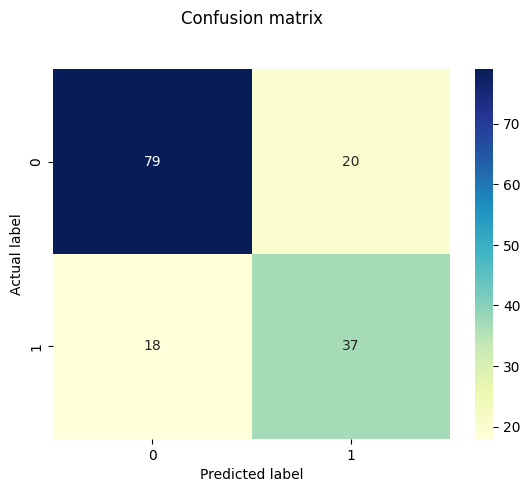

In [ ]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')